In [1]:
import dmrg2 as dmrg
import SpinSystems_2d as SS2d
import numpy as np
import matplotlib.pyplot as plt
from ncon import ncon
import MPO_class as MPO
import MPS_class as MPS
import seaborn as sns
import tdvp2 as tdvp
import matplotlib as mpl
#%matplotlib notebook 

In [2]:
for x in H.W:
    print(x.shape)

NameError: name 'H' is not defined

In [4]:
Lx = 15
Ly = 15

L = Lx*Ly

h = 0
J = 1.
H = SS2d.IsingMPO_2D(Lx,Ly,h,J)

In [12]:
time_engine = tdvp.TDVP2(MPS.getAllUp(L),H,chi_MAX=64)

def apply_flip(M,epsilon):
    theta = np.pi+2*epsilon
    flip = np.eye(2)*np.cos(theta/2) - 1j*np.sin(theta/2)*np.array([[0,1],[1,0]])
    for i in range(len(M)):
        M[i] = ncon([M[i],flip],[[-1,1,-3],[1,-2]])

In [13]:
mz_list = []
t_list = []
Mz_list = []
ent_ent = []

MzMPO = MPO.getMzMPO(L)

dt = 1
k  = 10
t_list.append(0.)

#time_engine.MPS.M[Lx//2*Ly+Ly//2] = ncon([time_engine.MPS.M[Lx//2*Ly+Ly//2],np.array([[0,1],[1,0]])],[[-1,1,-3],[1,-2]])

mz_list.append(MPO.return_LocalMz(time_engine.MPS).real)
Mz_list.append(MzMPO.contractMPOMPS(time_engine.MPS).real)
ent_ent.append(time_engine.MPS.compute_EntEntropy())
for j in range(201):
    print(j)
    time_engine.initialize()

    # Evolve the state of t1->t2, t2-t1=0.5
    for _ in range(k):
        time_engine.time_step(dt/k,1e-12)#1e-10)
    
    apply_flip(time_engine.MPS.M, 0.05)
    
    if time_engine.end_max:
        break
    t_list.append((j+1)*dt)
    mz_list.append(MPO.return_LocalMz(time_engine.MPS).real)
    Mz_list.append(MzMPO.contractMPOMPS(time_engine.MPS).real)
    ent_ent.append(time_engine.MPS.compute_EntEntropy())

0


C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:38: RuntimeWarning: beta[0] ~= 0 encountered during Lanczos iteration.
  warnings.warn(
C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:38: RuntimeWarning: beta[1] ~= 0 encountered during Lanczos iteration.
  warnings.warn(
C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:38: RuntimeWarning: beta[3] ~= 0 encountered during Lanczos iteration.
  warnings.warn(
C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:38: RuntimeWarning: beta[2] ~= 0 encountered during Lanczos iteration.
  warnings.warn(
C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:38: RuntimeWarning: beta[7] ~= 0 encountered during Lanczos iteration.
  warnings.warn(
C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:38: RuntimeWarning: beta[4] ~= 0 encountered during Lanczos iteration.
  warnings.warn(
C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:38: Runtim

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


KeyboardInterrupt: 

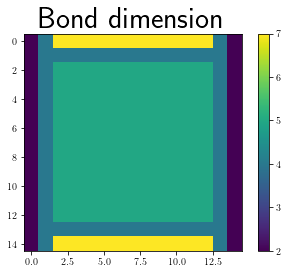

In [14]:
mz_ = np.array(mz_list).reshape(len(mz_list),Lx,Ly)

list_ = []
for x in time_engine.MPS.M:
    list_.append(np.max(x.shape))

plt.imshow(np.array(list_).reshape(Lx,Ly))
plt.title("Bond dimension",fontsize=30)
plt.colorbar()

In [15]:
list_

[2,
 4,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 4,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 2,
 2,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 2,
 2,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 2,
 2,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 2,
 2,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 2,
 2,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 2,
 2,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 2,
 2,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 2,
 2,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 2,
 2,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 2,
 2,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 4,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 4,
 2]

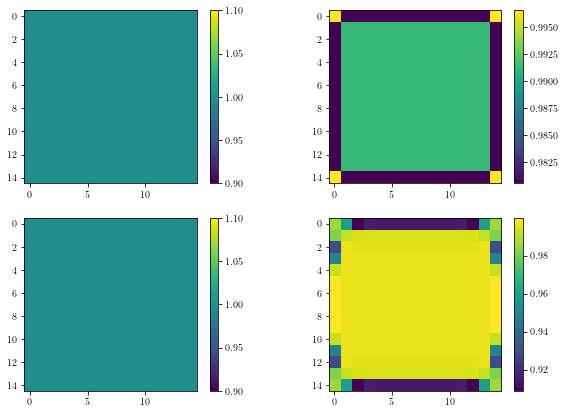

In [16]:
plt.figure(figsize=(10,7))
plt.subplot(221)
plt.imshow(np.abs(mz_[0,:,:].real))
plt.colorbar()
plt.subplot(222)
plt.imshow(np.abs(mz_[2,:,:].real))
plt.colorbar()
plt.subplot(223)
plt.imshow(np.abs(mz_[0,:,:].real))
plt.colorbar()
plt.subplot(224)
plt.imshow(np.abs(mz_[-1,:,:].real))
plt.colorbar()

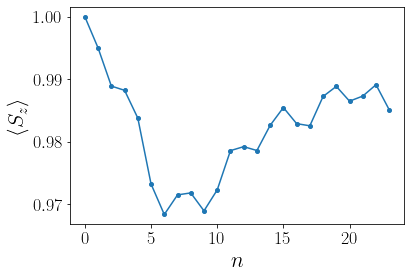

In [17]:
plt.rc('text',usetex=True)
plt.plot(t_list,np.abs(np.real(Mz_list)/L),'-o',markersize=4)
plt.ylabel(r"$\langle S_z\rangle$",fontsize=22)
plt.xlabel(r"$n$",fontsize=22)
plt.tick_params(labelsize=18)

In [18]:
mz_[-1,:,:].sum()/L

-0.9851187591563005

In [19]:
ent_ent = np.array(ent_ent)

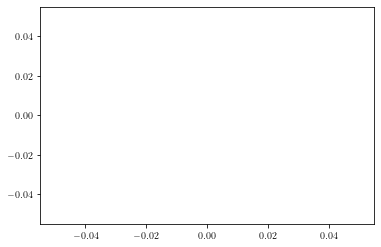

In [20]:
for x in range(11,21):
    plt.plot(ent_ent[0,x])

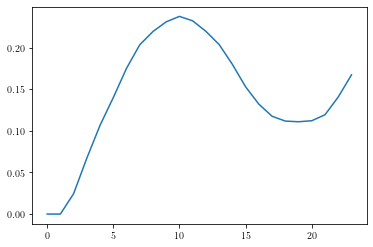

In [21]:
plt.plot(np.array(ent_ent)[:,10])

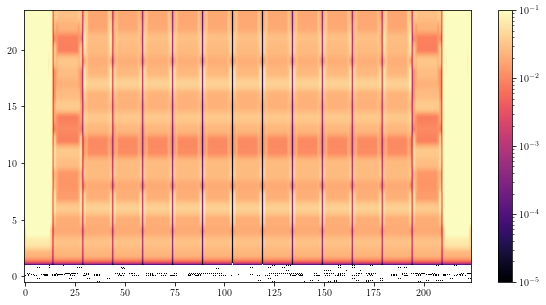

In [22]:
plt.figure(figsize=(10,5))
plt.imshow(ent_ent,origin='lower',aspect='auto',cmap=sns.color_palette('magma',as_cmap=True),norm=mpl.colors.LogNorm(vmin=1e-5,vmax=0.1))
cb = plt.colorbar()


In [23]:
for x in time_engine.MPS.M:
    print(x.shape)

(1, 2, 2)
(2, 2, 4)
(4, 2, 7)
(7, 2, 7)
(7, 2, 7)
(7, 2, 7)
(7, 2, 7)
(7, 2, 7)
(7, 2, 7)
(7, 2, 7)
(7, 2, 7)
(7, 2, 7)
(7, 2, 4)
(4, 2, 2)
(2, 2, 1)
(1, 2, 2)
(2, 2, 4)
(4, 2, 4)
(4, 2, 4)
(4, 2, 4)
(4, 2, 4)
(4, 2, 4)
(4, 2, 4)
(4, 2, 4)
(4, 2, 4)
(4, 2, 4)
(4, 2, 4)
(4, 2, 4)
(4, 2, 2)
(2, 2, 1)
(1, 2, 2)
(2, 2, 4)
(4, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 4)
(4, 2, 2)
(2, 2, 1)
(1, 2, 2)
(2, 2, 4)
(4, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 4)
(4, 2, 2)
(2, 2, 1)
(1, 2, 2)
(2, 2, 4)
(4, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 4)
(4, 2, 2)
(2, 2, 1)
(1, 2, 2)
(2, 2, 4)
(4, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 4)
(4, 2, 2)
(2, 2, 1)
(1, 2, 2)
(2, 2, 4)
(4, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)


<ipython-input-24-e7a6ce387285>:2: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  plt.imshow(np.abs(np.array(mz_list))-np.mean(np.abs(np.array(mz_list)),axis=0),origin='lower',aspect='auto',cmap = sns.color_palette('icefire',as_cmap=True),norm = mpl.colors.SymLogNorm(1e-4,vmin=-0.01,vmax=0.01))


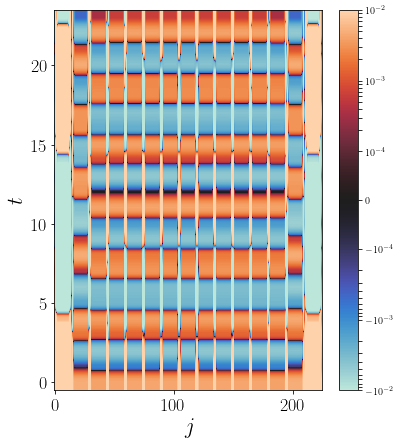

In [24]:
plt.figure(figsize=(6,7))
plt.imshow(np.abs(np.array(mz_list))-np.mean(np.abs(np.array(mz_list)),axis=0),origin='lower',aspect='auto',cmap = sns.color_palette('icefire',as_cmap=True),norm = mpl.colors.SymLogNorm(1e-4,vmin=-0.01,vmax=0.01))
plt.tick_params(labelsize=18)
plt.xlabel("$j$",fontsize=22)
plt.ylabel("$t$",fontsize=22)
plt.colorbar()

In [117]:
plt.imshow()

TypeError: imshow() missing 1 required positional argument: 'X'

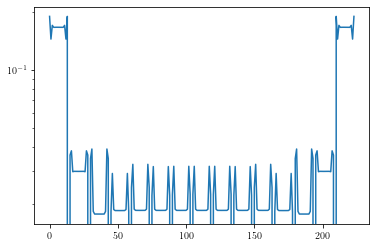

In [31]:
plt.plot(ent_ent[-1,:])

In [68]:
ent_ent

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00770112, 0.00770112, 0.00770112, ..., 0.00770112, 0.00770112,
        0.00770112],
       ...,
       [0.22306054, 0.37085024, 0.56722266, ..., 0.46155493, 0.28967795,
        0.21820891],
       [0.2282159 , 0.54783419, 0.93432461, ..., 1.00782288, 0.58742455,
        0.28187099],
       [0.13193247, 0.41482046, 0.67173215, ..., 0.56859648, 0.38136214,
        0.25776068]])

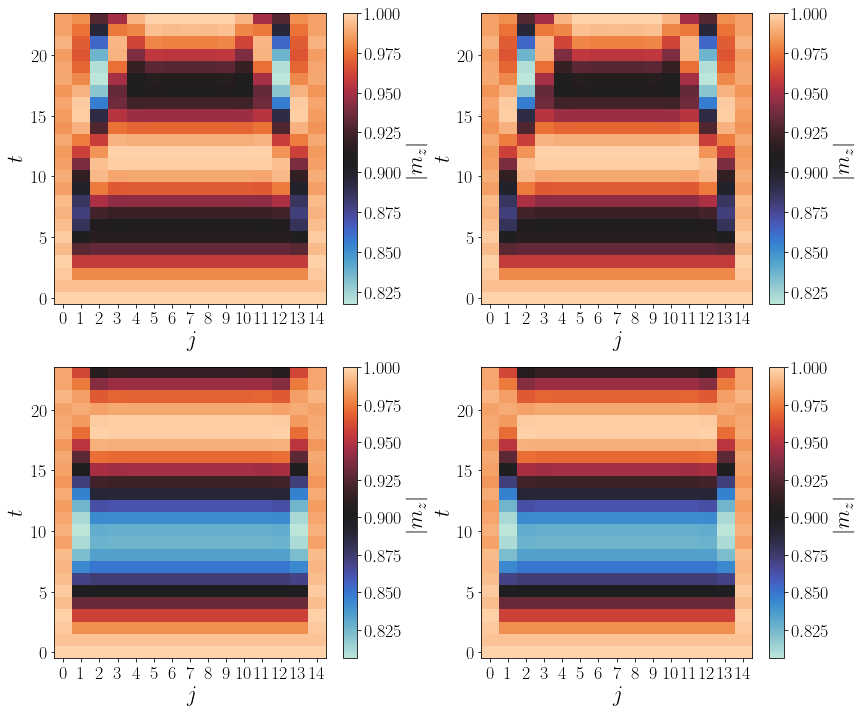

In [32]:
# import seaborn as sns

plt.rc('text',usetex=True)
plt.figure(figsize=(12,10))

plt.subplot(221)
plt.imshow(np.abs(mz_[:,:,0]),origin='lower',cmap=sns.color_palette('icefire',as_cmap=True),aspect='auto')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
cb.set_label(r"$|m_z|$",fontsize=22)
plt.ylabel("$t$",fontsize=22)
plt.xlabel("$j$",fontsize=22)
plt.tick_params(labelsize=18)
plt.xticks(np.arange(Lx))

plt.subplot(222)
plt.imshow(np.abs(mz_[:,:,-1]),origin='lower',cmap=sns.color_palette('icefire',as_cmap=True),aspect='auto')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
cb.set_label(r"$|m_z|$",fontsize=22)
plt.xticks(np.arange(Lx))

plt.ylabel("$t$",fontsize=22)
plt.xlabel("$j$",fontsize=22)
plt.tick_params(labelsize=18)

plt.subplot(223)
plt.imshow(np.abs(mz_[:,0,:]),origin='lower',cmap=sns.color_palette('icefire',as_cmap=True),aspect='auto')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
cb.set_label(r"$|m_z|$",fontsize=22)
plt.ylabel("$t$",fontsize=22)
plt.xlabel("$j$",fontsize=22)
plt.tick_params(labelsize=18)
plt.xticks(np.arange(Lx))

plt.subplot(224)
plt.imshow(np.abs(mz_[:,-1,:]),origin='lower',cmap=sns.color_palette('icefire',as_cmap=True),aspect='auto')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
cb.set_label(r"$|m_z|$",fontsize=22)
plt.xticks(np.arange(Lx))

plt.clim(min(np.abs(mz_[:,0,:]).flatten()),max(np.abs(mz_[:,0,:]).flatten()))
plt.ylabel("$t$",fontsize=22)
plt.xlabel("$j$",fontsize=22)
plt.tick_params(labelsize=18)

plt.tight_layout()

plt.savefig("pm.png")

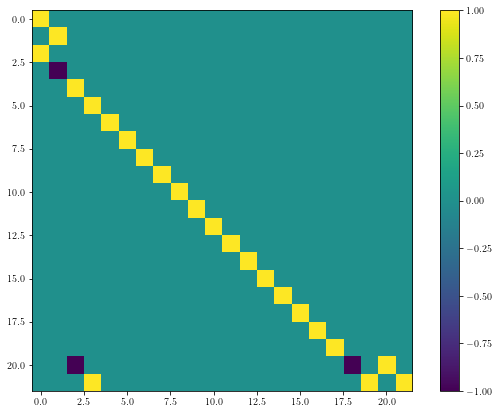

In [10]:
### MPO Plot ###
plt.figure(figsize=(10,7))
k = 10
shpW = H.W[k].shape
plt.imshow(H.W[k].transpose(0,2,1,3).reshape(shpW[0]*shpW[2],shpW[1]*shpW[3]))
if k == 0:
    plt.colorbar(orientation='horizontal')
else:
    plt.colorbar()

In [2]:
H.W[3][0,0,:,:]

NameError: name 'H' is not defined

In [29]:
time_engine.RT[3]

array([[[ 1.00000000e+00+5.55111512e-17j,
          4.85722573e-17-2.35922393e-16j,
          1.14491749e-16-6.93889390e-18j,
          6.50521303e-17-5.81132364e-17j,
          2.76471554e-17+4.55364912e-18j],
        [-9.73322216e-01-8.32667268e-17j,
         -2.08049580e-01+5.40804580e-02j,
         -7.41442302e-02-2.93927120e-02j,
         -3.76168240e-03+5.07750016e-03j,
          1.84309332e-03+1.39351525e-03j],
        [-9.66447581e-01+2.77555756e-17j,
          8.18237411e-02-4.17222700e-02j,
         -2.32224682e-01-3.66765988e-02j,
          4.59968589e-03+1.75659151e-02j,
         -6.83000980e-03-1.41625505e-02j],
        [-9.56180616e-01-2.77555756e-17j,
          5.93771241e-03+1.15637594e-02j,
          3.09461433e-03-3.57193878e-02j,
         -3.96833474e-03+3.71554589e-03j,
         -1.56610995e-01+7.71073709e-02j],
        [-9.95103013e-01+1.38777878e-16j,
          2.91992136e-03+1.69947105e-03j,
         -3.48661884e-03-9.06951258e-03j,
          3.93423399e-04+1.873

<h1> Check Exact Diagonalization !!!</h1>

In [4]:
Lx = 3
Ly = 3

L = Lx*Ly

h = .2
J = 1
H = SS2d.IsingMPO_2D(Lx,Ly,h,J)
H.compressMPO()

H_ = H.W[0]
for x in range(1,L):
    shpH = H_.shape
    shpHW = H.W[x].shape
    H_ = ncon([H_,H.W[x]],[[-1,1,-3,-5],[1,-2,-4,-6]]).reshape(shpH[0],shpHW[1],shpH[2]*shpHW[2],shpH[3]*shpHW[3])

H_ = H_.reshape(2**L,2**L)

import scipy.sparse as sps
from functools import reduce

def nested_tensor(lst):
    return reduce(sps.kron,lst)

def spin1_op_construct(sigma, h, j, L):
    list_tensor = []
    list_tensor += [sps.eye(2) for _ in range(j)] 
    list_tensor += [h*sigma] 
    list_tensor += [sps.eye(2) for _ in range(j+1,L)] 
    return nested_tensor( list_tensor )

def spin2_op_construct(sigmai, sigmaj, J, i, j, L):
    if i == j:
        return J*sps.eye(2**L)
    list_tensor = []
    i,j = np.min([i,j]),np.max([i,j])
    list_tensor += [sps.eye(2) for _ in range(i)] 
    list_tensor += [J*sigmai] 
    list_tensor += [sps.eye(2) for _ in range(i+1,j)] 
    list_tensor += [sigmaj]
    list_tensor += [sps.eye(2) for _ in range(j+1,L)]
    return nested_tensor(list_tensor)

H_real = 0

sigma_z = np.array([[1,0],[0,-1]])
sigma_x = np.array([[0,1],[1,0]])

for i in range(L-1):
    if (i+1)%Ly != 0:
        H_real += spin2_op_construct(sigma_z,sigma_z,-J,i,i+1,L)
    if (i+Ly)<(L):
        H_real += spin2_op_construct(sigma_z,sigma_z,-J,i,i+Ly,L)

for i in range(L):
    H_real += spin1_op_construct(sigma_x,-h,i,L)

e,w = np.linalg.eigh(H_real.toarray())

(H_real.toarray()-H_).sum()

AttributeError: 'int' object has no attribute 'shpW'

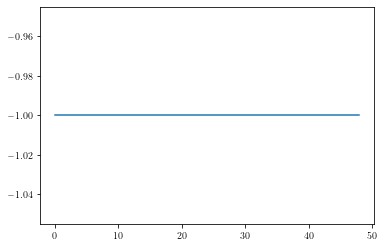

In [31]:
plt.plot(MPO.return_LocalMz(engine.MPS).real)